---
title: "Bootstrap Distributions"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-14"
categories: [python, datacamp, statistics, machine learning, sampling, distribution ]
image: "bootstrapDistribution.jpg"

---

# Bootstrap Distribution

We will learn resampling to perform bootstrapping and estimate variation in an unknown population. We will also learn the difference between sampling distributions and bootstrap distributions using resampling.

This **Bootstrap Distribution** is part of [Datacamp course: Introduction to sampling](https://app.datacamp.com/learn/courses/sampling-in-python)

This is my learning experience of data science through DataCamp

In [1]:
# Import seaborn with alias sns
import pandas as pd
import seaborn as sns
import numpy as np

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

## Bootstraping

The opposite of sampling from a population is bootstrapping. When sampling, we treat the dataset as the population and move to a smaller sample. By bootstrapping, we build up a theoretical population from a sample dataset. In bootstrapping, you can try to understand the variability due to sampling. When sampling the population multiple times is not possible, this is important.

Bootstrapping consists of three steps. The first step is to randomly sample with replacement to get a resample of the same size as the original dataset. Calculate a statistic, such as the mean of one of the columns. You can calculate complex statistics using bootstrapping, too, since the mean is not always the right choice. You can then repeat this many times to get a lot of bootstrap statistics.

The bootstrapping workflow is to generate a resample of the same size as the population, calculate a summary statistic, then repeat this to get a distribution of summary statistics.

### Generating a bootstrap distribution

Only the first step is different between generating a bootstrap distribution and generating a sampling distribution.

You make a sampling distribution by sampling without replacing the population. In order to make a bootstrap distribution, you start with a sample and then sample it with replacement. The rest of the process is the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process as many times as you like. With a histogram, you can visualize the distribution in each case.

In [2]:
spotify_sample=pd.read_feather('dataset/spotify_2000_2020.feather')
spotify_sample.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [3]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1,replace=True)

# Print the resample
print(spotify_1_resample)

       acousticness                                            artists  \
12654      0.196000  ['Ghostface Killah', 'GZA', 'Cappadonna', 'Mas...   
28298      0.003570                               ['Tyga', '2 Chainz']   
39466      0.022300                                         ['Future']   
12155      0.104000                      ['21 Savage', 'Metro Boomin']   
5937       0.315000                                   ['Dan Auerbach']   
...             ...                                                ...   
29568      0.000021                                     ['Spiderbait']   
35685      0.596000                                ['Cristian Castro']   
27664      0.000034                                    ['Lamb of God']   
34746      0.198000                                  ['Lucy Spraggan']   
6700       0.288000                                        ['Bacilos']   

       danceability  duration_ms  duration_minutes  energy  explicit  \
12654         0.791     263200.0       

In [4]:
# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5909201315536776


In [5]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Print the result
print(mean_danceability_1000)

[0.5908165858459766, 0.5919403279239485, 0.5906801709237565, 0.5925445650086422, 0.5897929205876703, 0.5914413649894373, 0.5911665546379874, 0.5921516444209718, 0.5909471168619166, 0.5919495006721721, 0.5913297532168235, 0.5900655319761859, 0.5911243854426733, 0.5919624495870943, 0.5907059319185711, 0.5904833637411178, 0.5918385874783945, 0.5916115805646246, 0.5910143364701363, 0.5907552909544843, 0.5914088486652583, 0.5910388779527559, 0.5907494406568082, 0.5900437992125984, 0.5910608555790282, 0.5899431318417515, 0.5933219272133667, 0.5925107835605916, 0.5906277342999808, 0.5903465095064336, 0.5897105795083541, 0.5907337886498943, 0.5908533272517765, 0.5913865205492606, 0.5912424740733628, 0.5909742918187055, 0.5904654959669675, 0.5923181990589591, 0.59154376320338, 0.5906797580180526, 0.5928538433839062, 0.5918036057230651, 0.5905787809679278, 0.5907766300172844, 0.5905926757249856, 0.5921269108891877, 0.591452971960822, 0.5912236532552334, 0.5931016564240446, 0.5912387051085077, 0.

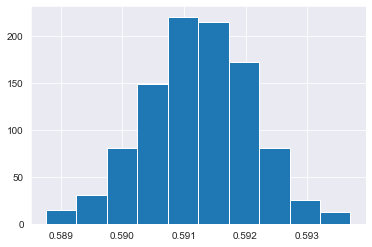


 From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is


In [7]:
# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()
print("\n From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is")

### Sampling distribution vs. bootstrap distribution

The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

In [8]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity
    	spotify_sample.sample(n=500)['popularity'].mean()
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)

[55.156, 54.118, 55.376, 54.568, 54.388, 54.224, 55.76, 53.966, 53.628, 54.742, 55.174, 55.048, 54.43, 55.132, 54.576, 54.818, 54.856, 54.782, 55.504, 55.072, 55.03, 55.208, 55.584, 54.212, 53.862, 55.898, 54.132, 54.812, 55.352, 54.844, 55.262, 54.164, 54.582, 54.758, 55.41, 55.326, 55.668, 54.088, 54.372, 55.12, 55.33, 54.414, 54.618, 54.034, 54.272, 55.154, 54.266, 54.71, 54.324, 54.472, 55.028, 54.682, 54.898, 54.178, 54.482, 54.914, 55.318, 55.062, 55.038, 54.69, 54.932, 54.576, 55.248, 54.524, 55.426, 54.062, 54.454, 54.588, 55.078, 55.388, 55.514, 53.984, 54.606, 54.016, 54.674, 55.646, 54.608, 54.848, 54.802, 55.948, 55.272, 55.246, 54.794, 54.904, 54.152, 55.104, 55.38, 55.1, 55.278, 54.692, 54.928, 55.234, 55.046, 54.004, 54.41, 55.282, 54.172, 54.576, 54.942, 55.022, 54.408, 54.888, 54.964, 54.696, 54.534, 55.446, 55.018, 54.854, 55.104, 55.792, 53.82, 54.028, 54.276, 54.922, 53.764, 54.936, 54.926, 54.962, 54.79, 54.89, 54.522, 55.116, 54.524, 54.672, 54.76, 55.57, 54.03, 5

### Compare sampling and bootstrap means